[Text(0.5, 1.0, 'Plot'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

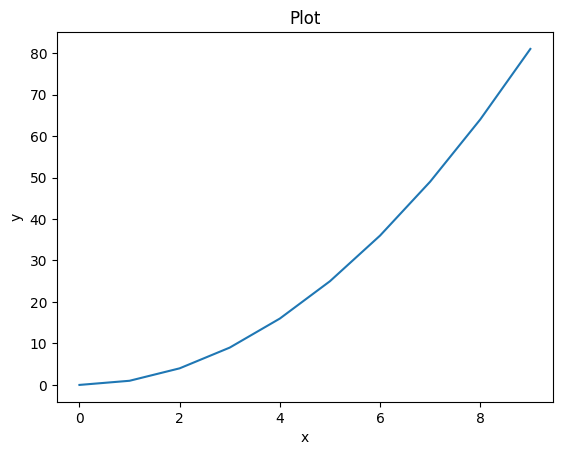

In [2]:
#1

import matplotlib.pyplot as plt

x = list(range(10))
y = [i**2 for i in x]
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)
ax.set(title="Plot", xlabel="x", ylabel="y")


In [11]:
# 2

from random import randint

dice_outcomes = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0,}

dice = [randint(1,6) for _ in range (10**6)]

for roll in dice:
    dice_outcomes[roll] += 1

#print(dice)
print(dice_outcomes)


{1: 166784, 2: 166059, 3: 166851, 4: 166474, 5: 166600, 6: 167232}


In [17]:
# 3

from math import pi

def volume(r):
    v = 4*pi*r**3/3
    return v        # OBS retrun

while True:
    r = input("Give value for radius")
    try:
        r = float(r)
        if r <= 0:
            print ("Radius must be larger than 0")
        else:
            break
    except ValueError: # OBS Value and not Type
        print(f"Radius must be a float or int and not {type(r)}")

print(f"{r} gives volume {volume(r)}")

Radius must be a float or int and not <class 'str'>
Radius must be larger than 0
Radius must be a float or int and not <class 'str'>
Radius must be a float or int and not <class 'str'>
5.0 gives volume 523.5987755982989


In [93]:
# 3 igen med ???????????????????????

from math import pi

def volym(r):
    v = 4 * pi * r**3/3
    return v
    

while True:
    r = input("Give a radius")

    try:
        r = float(r)
        if r <= 0:
           raise ValueError ("Value must be larger than 0")
        break
    except ValueError as err:
        print (repr(err),"test")

print(f"Radien {r} ger volymen {volym(r)}")

#???????????????????????????????????????????????5
# rad 17 byta err mot meddelande så funkar bara 17 o inte 14
# rad 14 byta till print så funkar 14
# är inte str input TypeError?

ValueError('Value must be larger than 0') test
ValueError("could not convert string to float: 'g'") test
Radien 3.0 ger volymen 113.09733552923255


In [1]:
# 4

with open("../Data/bamba.txt", "r") as file:
    file = file.read() # OBS behöver file=
    print(file)

v42
Chili sin carne
Pannkakor
Ã„rtsoppa
Kebab
Vegetarisk lasagne


In [12]:
# 5

from math import sqrt

def distance(p1, p2, q1, q2):
    d = sqrt((p1-q1)**2+(p2-q2)**2)
    return d

with open("../Data/testpunkter.txt", "r") as file:
    data_list_initial = file.readlines()[1:] #skppar 1a raden med headings

    test_point_list = []
    for line in data_list_initial:
        (p1, p2, q1, q2) = line.replace("(", "").replace(")", "").replace("\n","").split(",")
        p1 = int(p1)
        p2 = int(p2)
        q1 = int(q1)
        q2 = int(q2)
        test_point_list.append([p1, p2, q1, q2])

distance_list = []
for p1, p2, q1, q2 in test_point_list:
    d = distance(p1, p2, q1, q2)
    distance_list.append(d)

print(test_point_list)
print(distance_list)

[[1, 2, 0, 0], [2, 0, 3, 5], [-2, -2, 9, 2]]
[2.23606797749979, 5.0990195135927845, 11.704699910719626]


In [74]:
# 6

from random import choice

cards = ["A", 2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K"]
dealer_cards = []
player_cards = []

dealer_cards = [choice(cards) for _ in range (2)]
print(f"Dealern has 2 cards, where the first one is {dealer_cards[0]}")

player_cards = [choice(cards)] # 1a kortet delas ut här

next_card = "y"
while next_card == "y":
    player_cards.append(choice(cards)) # 2a kortet delas ut här
    print(f"Your cards are {player_cards}")
    next_card = input("Whould you like another card? y/n") # frågar om 3e kort, 4e kort osv


# omvanlar alla J, Q, K, A till dess numeriska värde i listorna för att kunna summera
# sätt 2: gör en tom ny lista och appenda till den istället
dealer_cards_numbers_only = []
for card in dealer_cards:
    if card == "J" or card == "Q" or card == "K":
        dealer_cards_numbers_only.append(10)
    elif card == "A":
        if sum(dealer_cards_numbers_only) < 11:
            dealer_cards_numbers_only.append(11)
        else:
            dealer_cards_numbers_only.append(1)
    else:
        dealer_cards_numbers_only.append(card)
dealer_sum = sum(dealer_cards_numbers_only)

# sätt 1 enumarate (ändrar direkt i listan)
for index, card in enumerate(player_cards):
    if card in ["J", "Q", "K"]:
        player_cards[index] = 10
    if card == "A":
        # om A 1a kortet är index ==0
        #summera alla kort innan A för att avgöra om A är 11 eller 1
        if index == 0 or sum(player_cards[:index-1]) <= 10: 
            player_cards[index] = 11
        else:
            player_cards[index] = 1
player_sum = sum(player_cards)

if player_sum > 21:
    for index, card in enumerate(player_cards):
        if card == 11:
            player_cards[index] = 1
    player_sum = sum(player_cards)

if player_sum <= 21 and player_sum > dealer_sum:
    print (f"Congratulatins! Your score is {player_sum}, dealers score is {dealer_sum}")
else:
    print (f"Too bad! Your score is {player_sum}, dealers score is {dealer_sum}")

Dealern has 2 cards, where the first one is 8
Your cards are ['Q', 9]
Congratulatins! Your score is 19, dealers score is 18
[10, 9]


In [65]:
# 7
from math import sqrt, pi, log
import matplotlib.pyplot as plt
import numpy as np

class NormalDist:
    def __init__(self, mu: float, sigma:float) -> None:
        self._mu = mu
        self._sigma = sigma
    
    def pdf (self, x: float) -> float:
        f = (np.pi*self._sigma) * np.exp(-0.5*((x-self._mu)/self._sigma)**2)
        return f
    
    def plot_pdf (self, x: float) -> None:
        x = np.linspace(-x,x,50)
        plt.plot(x, self.pdf(x))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Normal distribution")

    def __add__ (self, other: float): # returnerar NOrmalDist
        mu = self._mu + other._mu                               # går ej om man bara skriver self._mu += other.mu
        sigma = self._sigma + other._sigma
        return NormalDist(mu, sigma)
    
    
    def __repr__ (self) -> str:
        return f"NormalDist ({self._mu}, {self._sigma})"

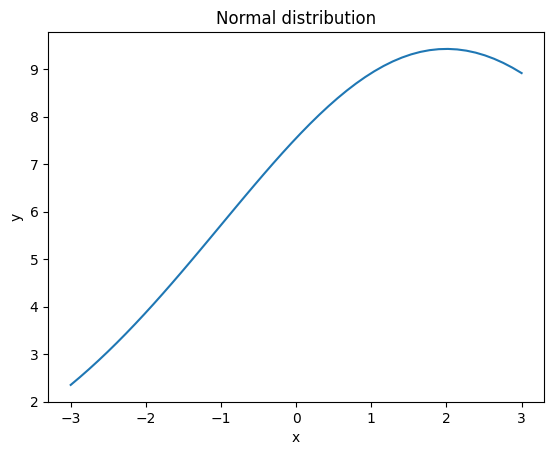

In [66]:
nd = NormalDist(0,1)
nd2 = NormalDist(2,2)
nd3 = nd + nd2
nd3.plot_pdf(3)


In [95]:
#5 new solution

from math import sqrt

def distance (point1, point2):
    d = sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    return d

with open ("../Data/testpunkter.txt", "r") as file, open("../Data/testpunkter.txt", "a") as file_append:
    data = file.readlines()[1:]

    point1_list = []
    point2_list = []
    for line in data:
        p1, p2, q1, q2 = line.replace("(", "").replace(")", "").split(",")
        point1 = [int(p1), int(p2)]
        point2 = [int(q1), int(q2)]
        point1_list.append(point1)
        point2_list.append(point2)

    distance_list = [distance(point1, point2) for point1, point2 in zip(point1_list, point2_list)]
    
    file_append.write(f"\nDistances are:\n{distance_list}")



print(point1_list)
print(point2_list)
print(distance_list)
        



[[1, 2], [2, 0], [-2, -2]]
[[0, 0], [3, 5], [9, 2]]
[2.23606797749979, 5.0990195135927845, 11.704699910719626]
